<a href="https://colab.research.google.com/github/vk-98/CNN/blob/master/cifar10_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cifar10
import matplotlib.pyplot as plt

In [0]:
cifar10.data_path = "data/CIFAR-10/"

In [9]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [10]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
#loading training and testing dataset
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [12]:
images_train.shape

(50000, 32, 32, 3)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

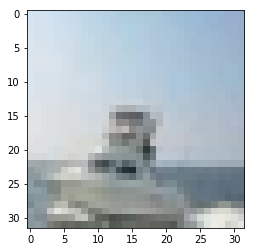

In [18]:
plt.imshow(images_train[100])
labels_train[100]

In [20]:
images_train.shape

(50000, 32, 32, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
#train the model
model.fit(images_train, labels_train, validation_data=(images_test, labels_test), epochs=3)

W0825 09:28:33.407391 139664769828736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 09:28:33.465780 139664769828736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 113s 2ms/step - loss: 1.5430 - acc: 0.4471 - val_loss: 1.3309 - val_acc: 0.5304
Epoch 2/3
50000/50000 [==============================] - 110s 2ms/step - loss: 1.2575 - acc: 0.5573 - val_loss: 1.3737 - val_acc: 0.5235
Epoch 3/3
50000/50000 [==============================] - 107s 2ms/step - loss: 1.1438 - acc: 0.5974 - val_loss: 1.1022 - val_acc: 0.6129


In [29]:
loss_and_metrics = model.evaluate(images_test, labels_test)

10000/10000 [==============================] - 6s 559us/step


In [31]:
print("Accuracy of the model is ", loss_and_metrics[1])

Accuracy of the model is  0.6129
